In [1]:
#H0 - There is no impact of gender on region of secondary school
#Ha - There is an impact of gender on region of secondary school

# importing libraries
import pandas
import numpy
import matplotlib.pyplot as plt

data = pandas.read_csv('StudentStatistics.csv', sep = ';')
data.head()
# Displaying data in the Gen_Gender column
data['Gen_Gender'].value_counts()

Gen_Gender
Male      34
Female    12
Name: count, dtype: int64

In [2]:
# Displaying data in the Gen_SecSchool column
data['Gen_SecSchool'].value_counts()

Gen_SecSchool
The Netherlands          24
Asia                      7
Africa                    5
Othern Western Europe     3
South America             1
North America             1
Eastern Europe            1
Name: count, dtype: int64

In [3]:
# Data other than The Netherlands in the Gen_SecSchool column in set as 'Others'
data['Gen_SecSchool'][data['Gen_SecSchool']!='The Netherlands'] = 'Others'

data['Gen_SecSchool'].value_counts()

<ipython-input-3-6b03593a5045>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gen_SecSchool'][data['Gen_SecSchool']!='The Netherlands'] = 'Others'


Gen_SecSchool
Others             31
The Netherlands    24
Name: count, dtype: int64

In [4]:
# Visualising the data in the form of a table using mycrosstab

mycrosstab = pandas.crosstab(data['Gen_Gender'], data['Gen_SecSchool'])
mycrosstab

Gen_SecSchool,Others,The Netherlands
Gen_Gender,,
Female,4,8
Male,18,16


<function matplotlib.pyplot.show(close=None, block=None)>

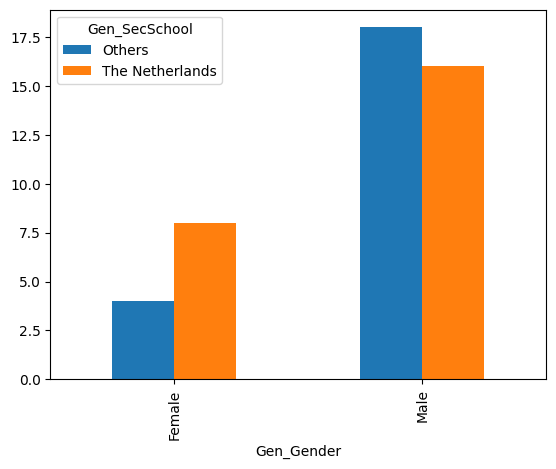

In [5]:
# Plotting the table content in a bar
mycrosstab.plot(kind = 'bar')
plt.show

In [6]:
# Applying the Fisher Exact test

# H0 - Both the columns Gen_Gender and Gen_SecSchool has no relation
# Ha - Both the columns Gen_Gender and Gen_SecSchool has a relation

from scipy.stats import fisher_exact

fisher_exact(mycrosstab)

SignificanceResult(statistic=0.4444444444444444, pvalue=0.32137504230527486)

In [7]:
pvalue=0.32137504230527486

# Since pvalue > 0.05, null value is accepted

# Applying odds ratio

a = mycrosstab.iloc[0,0]
b = mycrosstab.iloc[0,1]
c = mycrosstab.iloc[1,0]
d = mycrosstab.iloc[1,1]

OR = (a/b)/(c/d)

if OR < 1.49:
  print('negligible')
elif OR < 3.45:
  print('small')
elif OR < 9:
  print('medium')
else:
  print('large')


negligible


In [8]:
OR

0.4444444444444444

Fisher Exact Test did not find any influence of gender on the location of the secondary school (pvalue = 0.32) and further the odds ratio effect size was negligible (OR = 0.444)